# Utility Setup

Some plot configurations

In [18]:
import numpy as np
import os
#set the random seed for numpy
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from matplotlib.colors import ListedColormap

#decision boundary plot
def plot_decision_boundary(clf, X, y, alpha=0.5, contour=True):
    axes = [np.min(X, axis=0)[0], np.max(X, axis=0)[0], np.min(X, axis=0)[1], np.max(X, axis=0)[1]]
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()] #compared to flatten, ravel doesn't return a copy
    y_pred = clf.predict(X_new).reshape(x1.shape)
    cmap1 = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contour(x1, x2, y_pred, alpha=0.3, cmap=cmap1)
    if contour:
        cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, alpha=0.8, cmap=cmap2)
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.xlabel(r'$x_2$', fontsize=18, rotation=0)

Prepare the training and testing data from moons dataset 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)],
    voting='soft')

for clf in [log_clf, rf_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.5f'%(accuracy_score(y_test, y_pred)))

LogisticRegression 0.86400
RandomForestClassifier 0.87200
SVC 0.88800
VotingClassifier 0.91200


C:\Users\simin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging Ensembles

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                            n_estimators = 100,
                            max_samples = 50,
                            n_jobs = -1,
                            random_state = 42)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, '%.5f'%(accuracy_score(y_test, y_pred_bag)))

rf_clf = RandomForestClassifier(n_estimators = 500,
                                max_features = None,
                                max_leaf_nodes = 16,
                                n_jobs=-1,
                                random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(rf_clf.__class__.__name__, '%.5f'%(accuracy_score(y_test, y_pred_rf)))


BaggingClassifier 0.91200
RandomForestClassifier 0.91200



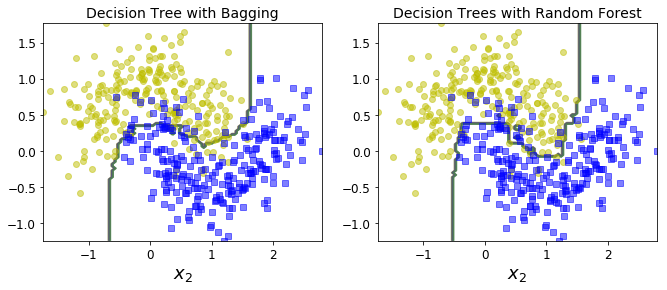

In [29]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with Bagging", fontsize=14)
plt.subplot(122)
plot_decision_boundary(rf_clf, X, y)
plt.title("Decision Trees with Random Forest", fontsize=14)
plt.tight_layout
plt.show()